In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Выборка размера $N = 10000$ из распределения с плотностью $p(x) = \frac{5}{x^{6}}I(x\geq 1)$

Пусть $\xi$ случайная величина с плотностью $p(x) = \frac{5}{x^{6}}I(x\geq 1)$. Тогда

$$E\xi = \int_{1}^{+\infty}\frac{5\cdot x}{x^6} dx = -\frac{5}{4x^{4}}\bigg|_{1}^{+\infty} = \frac{5}{4}$$

$$E\xi^{2} = \int_{1}^{+\infty}\frac{5\cdot x^{2}}{x^6} dx = -\frac{5}{3x^{3}}\bigg|_{1}^{+\infty} = \frac{5}{3}$$

$$D\xi = E\xi^{2} - (E\xi)^{2} = \frac{5}{48}$$

In [56]:
class minus_six_gen(sts.rv_continuous):
    def _pdf(self, x):
        return 5./(np.power(x,6))
minus_six = minus_six_gen(a=1, name='minus_six')

In [71]:
N = 10000

sample = minus_six.rvs(size = N)
print sample

[ 1.32468222  1.12302263  1.34223426 ...,  1.06359346  2.27998621
  1.0392573 ]


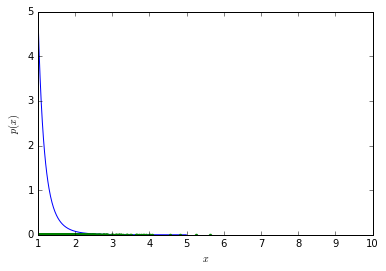

In [80]:
x = np.arange(1, 5, 0.01)
pdf = minus_six.pdf(x)
plt.plot(x, pdf)
plt.plot(sample, 0*sample, '.')
plt.xlim(1, 10)
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.show()

В массивах хранятся элементы, соответсвующие выборочному первому и второму моменту,а так же выборочной дисперсии для каждого $n\leq N$

$first \sim \bar{X}$

$second \sim \bar{X^{2}}$

$S \sim S^{2} = \bar{X^{2}} - (\bar{X})^{2}$

In [81]:
avrg_1 = float(sample[0])
avrg_2 = float(sample[0])**2

first = np.array([avrg_1])
second = np.array([avrg_2])
for x in xrange(1,N):
    avrg_1 = (avrg_1*x + sample[x])/(x+1)   
    first = np.append(first, avrg_1)
    avrg_2 = (avrg_2*x + sample[x]**2)/(x+1)   
    second = np.append(second, avrg_2)

S = second - first**2

#### Построение графика модуля разности выборочной дисперсии и $D\xi = \frac{5}{48}$

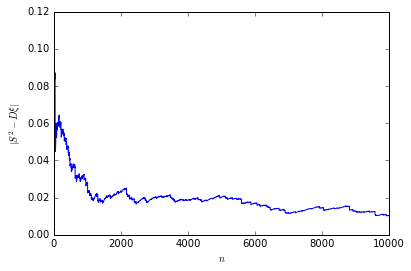

In [85]:
x = np.linspace(0, N, N)
D = 5.0/48
plt.plot(x, np.abs(S - D))
plt.ylabel('$|S^{2} - D\\xi|$')
plt.xlabel('$n$')
plt.show()

## Аналогичные построения для выборки из распределения $Cauchy(1)$

In [86]:
t = 1
cauchy_rv = sts.cauchy(t)
sample = cauchy_rv.rvs(N)

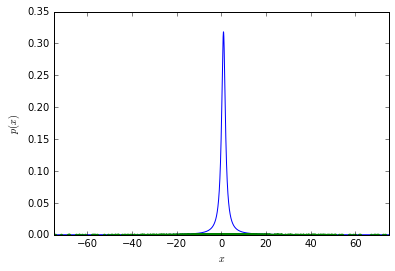

In [90]:
x = np.arange(-N, N, 0.01)
pdf = cauchy_rv.pdf(x)
plt.plot(x, pdf)
plt.plot(sample, 0*sample, '.')
plt.xlim(-75, 75)
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.show()

В массивах хранятся элементы, соответсвующие выборочному первому и второму моменту,а так же выборочной дисперсии для каждого $n\leq N$

$first \sim \bar{X}$

$second \sim \bar{X^{2}}$

$S \sim S^{2} = \bar{X^{2}} - (\bar{X})^{2}$

In [91]:
avrg_1 = float(sample[0])
avrg_2 = float(sample[0])**2

first = np.array([avrg_1])
second = np.array([avrg_2])
for x in xrange(1,N):
    avrg_1 = (avrg_1*x + sample[x])/(x+1)   
    first = np.append(first, avrg_1)
    avrg_2 = (avrg_2*x + sample[x]**2)/(x+1)   
    second = np.append(second, avrg_2)

S = second - first**2

#### Построение графика выборочной дисперсии

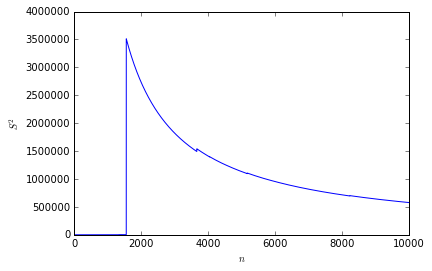

In [92]:
x = np.linspace(0, N, N)
plt.plot(x, S)
plt.ylabel('$S^{2}$')
plt.xlabel('$n$')
plt.show()